In [37]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [38]:
pd.set_option('max_columns', None)

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

### Run the Beer_dataset_EDA notebook in order to generate preprocessed training data and test data

In [40]:

# Load the saved numpy arrays
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

In [41]:
print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (7279, 11)
X_test.shape :  (1820, 11)
y_train.shape :  (7279,)
y_test.shape :  (1820,)


# 3. Training different ML models

### 3.1 Baseline Regression model using Random forest regressor
A baseline regression model is defined without any hyper-parameter tuning. I will then define three regression models and tune them such that their performance should be better than the baseline model

In [128]:
from sklearn.ensemble import RandomForestRegressor
#import xgboost as xgb

forest_model = RandomForestRegressor(random_state = 42)

forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [129]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [130]:
y_pred = forest_model.predict(X_test)

print('MSE: ', mean_squared_error(y_test, y_pred))

MSE:  49.84730208626374


### Visualize some of the predicted data

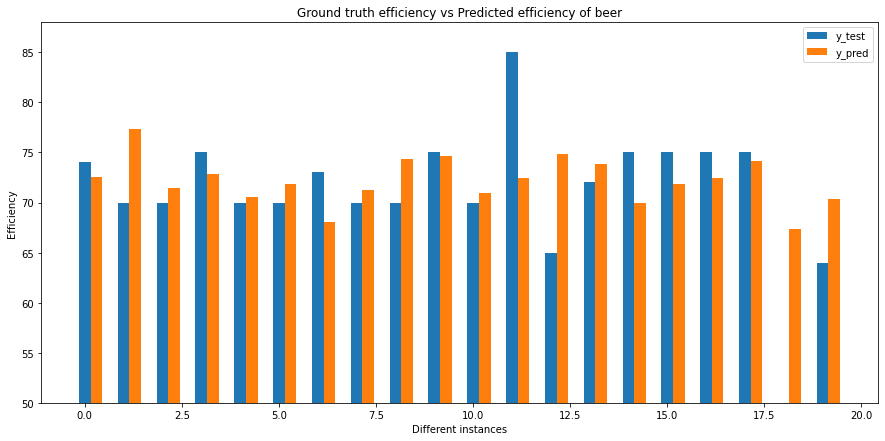

In [132]:
N1 = 270
N2 = 290

# Specify the values of blue bars (height)
y_true_eff = y_test[N1:N2]
# Specify the values of orange bars (height)
y_pred_eff = y_pred[N1:N2]

# Position of bars on x-axis
ind = np.arange(N2 - N1)

# Figure size
plt.figure(figsize=(15,7))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, y_true_eff , width, label='y_test')
plt.bar(ind + width, y_pred_eff, width, label='y_pred')

plt.xlabel('Different instances')
plt.ylabel('Efficiency')
plt.title('Ground truth efficiency vs Predicted efficiency of beer')

ax = plt.gca()
ax.set_ylim([50, max(max(y_true_eff), max(y_pred_eff))+3])

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

## Model 1: Random forest regression model to predict Efficiency scores

In [49]:
forest_model = RandomForestRegressor(n_estimators = 100, random_state = 42)

scores = cross_val_score(forest_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores  

array([-43.84382246, -51.89873342, -49.45695783, -44.81466184,
       -50.71072839])

In [50]:
# Grid search
#                'max_depth': max_depth,

forest_model = RandomForestRegressor(random_state = 42, n_jobs = -1)
folds = KFold(n_splits = 5, shuffle = False, random_state = 42)

hyper_params = {'n_estimators': [200, 300],
                'max_features': ['auto'],
                'min_samples_split': [2, 5] ,
                'min_samples_leaf': [1, 3, 5],
                'bootstrap': [True] }

model_cv = GridSearchCV(estimator = forest_model, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)



D:\Anaconda3\envs\ML_omscs\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [51]:
model_cv.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=False),
             estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             param_grid={'bootstrap': [True], 'max_features': ['auto'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [52]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

cv_results.drop(['mean_fit_time','std_fit_time','mean_score_time','std_score_time'], axis = 1, inplace = True)

In [53]:
cv_results

,param_bootstrap,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,True,auto,1,2,200,"{'bootstrap': True, 'max_features': 'auto', 'm...",-43.754766,-51.424813,-49.271409,-44.290630,-50.225748,-47.793473,3.158099,12,-6.723710,-6.475626,-6.591933,-6.634831,-6.389608,-6.563142,0.117918
1,True,auto,1,2,300,"{'bootstrap': True, 'max_features': 'auto', 'm...",-43.780562,-51.179482,-49.040225,-44.306129,-50.069928,-47.675265,3.046206,10,-6.693092,-6.416003,-6.505740,-6.582243,-6.352917,-6.509999,0.120225
2,True,auto,1,5,200,"{'bootstrap': True, 'max_features': 'auto', 'm...",-43.601730,-51.545968,-49.053133,-44.259376,-50.231381,-47.738317,3.214240,11,-10.035689,-9.578729,-9.785570,-9.912133,-9.643091,-9.791042,0.168233
3,True,auto,1,5,300,"{'bootstrap': True, 'max_features': 'auto', 'm...",-43.573109,-51.298257,-48.658320,-44.224549,-50.156090,-47.582065,3.128535,5,-9.988573,-9.540874,-9.755594,-9.856742,-9.593448,-9.747046,0.165252
4,True,auto,3,2,200,"{'bootstrap': True, 'max_features': 'auto', 'm...",-42.812996,-51.362481,-48.260889,-44.235734,-50.497102,-47.433841,3.378813,3,-16.595470,-15.689621,-15.968880,-16.057031,-15.862521,-16.034705,0.305947
5,True,auto,3,2,300,"{'bootstrap': True, 'max_features': 'auto', 'm...",-42.859813,-51.454458,-48.083086,-44.260181,-50.488886,-47.429285,3.373838,1,-16.543954,-15.650263,-15.958253,-16.033438,-15.880497,-16.013281,0.294775
6,True,auto,3,5,200,"{'bootstrap': True, 'max_features': 'auto', 'm...",-42.812996,-51.362481,-48.260889,-44.235734,-50.497102,-47.433841,3.378813,3,-16.595470,-15.689621,-15.968880,-16.057031,-15.862521,-16.034705,0.305947
7,True,auto,3,5,300,"{'bootstrap': True, 'max_features': 'auto', 'm...",-42.859813,-51.454458,-48.083086,-44.260181,-50.488886,-47.429285,3.373838,2,-16.543954,-15.650263,-15.958253,-16.033438,-15.880497,-16.013281,0.294775
8,True,auto,5,2,200,"{'bootstrap': True, 'max_features': 'auto', 'm...",-42.921752,-51.622709,-48.373254,-44.516238,-50.747897,-47.636370,3.408176,9,-23.819003,-22.597655,-23.129435,-23.231922,-22.821792,-23.119962,0.415450
9,True,auto,5,2,300,"{'bootstrap': True, 'max_features': 'auto', 'm...",-42.944114,-51.612810,-48.293104,-44.481183,-50.734742,-47.613190,3.400384,7,-23.769134,-22.523206,-23.106310,-23.199205,-22.836354,-23.086842,0.414477


In [54]:
best = model_cv.best_params_

In [55]:
print("Best parameters : ", model_cv.best_params_)

Best parameters :  {'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 300}


In [119]:
best_randomforest = RandomForestRegressor(n_estimators = best['n_estimators'], min_samples_leaf = best['min_samples_leaf'], 
                                         min_samples_split = best['min_samples_split']
                                         )

In [120]:
best_randomforest.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=3, n_estimators=300)

## Model 2: XGBoost algorithm for regression

In [59]:
import xgboost as xgb

In [60]:
xgboost_model = xgb.XGBRegressor()

In [61]:
xgboost_model = xgb.XGBRegressor(random_state = 42, n_jobs = -1)
folds = KFold(n_splits = 5, shuffle = False, random_state = 42)

hyper_params = {'n_estimators': [1000, 1500],
                'max_depth' : [1, 3, 5],
                'eta': [0.1, 0.01] }

model_cv_xgb = GridSearchCV(estimator = xgboost_model, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)

D:\Anaconda3\envs\ML_omscs\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [62]:
model_cv_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.7min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=False),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weigh...
                                    n_estimators=100, n_jobs=-1,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=42, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsamp

In [63]:
cv_results_xgb = pd.DataFrame(model_cv_xgb.cv_results_)
cv_results_xgb

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_eta,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.599552,0.018967,0.001753,0.002182,0.1,1,1000,"{'eta': 0.1, 'max_depth': 1, 'n_estimators': 1...",-43.589074,-51.958595,-48.498660,-45.324729,-53.940260,-48.662264,3.889118,6,-45.543032,-43.650078,-45.150922,-45.315387,-43.352412,-44.602366,0.912513
1,0.887948,0.022673,0.006250,0.007654,0.1,1,1500,"{'eta': 0.1, 'max_depth': 1, 'n_estimators': 1...",-43.794797,-51.795324,-48.510265,-45.295575,-53.842939,-48.647780,3.786934,5,-44.925365,-43.077316,-44.570863,-44.740414,-42.795029,-44.021797,0.897922
2,1.323917,0.006142,0.003125,0.006250,0.1,3,1000,"{'eta': 0.1, 'max_depth': 3, 'n_estimators': 1...",-46.627554,-52.183281,-51.708432,-46.048479,-53.495339,-50.012617,3.062351,8,-23.016547,-22.178156,-22.357129,-22.238310,-22.710342,-22.500097,0.317346
3,1.952797,0.015309,0.009375,0.007654,0.1,3,1500,"{'eta': 0.1, 'max_depth': 3, 'n_estimators': 1...",-47.743027,-53.416793,-52.931155,-47.062037,-54.434608,-51.117524,3.079388,10,-18.422633,-17.895853,-18.195475,-17.927212,-18.239915,-18.136218,0.198875
4,2.198665,0.014071,0.015626,0.000002,0.1,5,1000,"{'eta': 0.1, 'max_depth': 5, 'n_estimators': 1...",-47.057704,-55.535752,-54.646940,-47.705377,-53.541717,-51.697498,3.586008,11,-6.287969,-6.168110,-6.084225,-5.671240,-5.944606,-6.031230,0.211923
5,3.404759,0.117728,0.012374,0.006192,0.1,5,1500,"{'eta': 0.1, 'max_depth': 5, 'n_estimators': 1...",-47.786847,-56.835154,-56.204671,-48.780885,-54.630165,-52.847545,3.807819,12,-3.107706,-3.029765,-3.014445,-2.826091,-2.943844,-2.984370,0.094733
6,0.585721,0.019928,0.006250,0.007655,0.01,1,1000,"{'eta': 0.01, 'max_depth': 1, 'n_estimators': ...",-43.645272,-54.109271,-50.240200,-47.058103,-55.412710,-50.093111,4.364292,9,-50.044062,-47.751182,-48.920965,-49.304534,-47.300427,-48.664234,1.007319
7,0.893726,0.018221,0.009374,0.007654,0.01,1,1500,"{'eta': 0.01, 'max_depth': 1, 'n_estimators': ...",-43.520303,-53.502546,-49.531923,-46.607665,-55.114582,-49.655404,4.278938,7,-49.155443,-46.930627,-48.159944,-48.468844,-46.449624,-47.832896,0.998805
8,1.315519,0.011780,0.003125,0.006249,0.01,3,1000,"{'eta': 0.01, 'max_depth': 3, 'n_estimators': ...",-43.852360,-51.320495,-47.927969,-44.681029,-52.706119,-48.097594,3.502836,3,-40.616066,-38.740596,-40.436280,-40.432322,-38.746607,-39.794374,0.860519
9,1.934267,0.007565,0.012493,0.006247,0.01,3,1500,"{'eta': 0.01, 'max_depth': 3, 'n_estimators': ...",-44.295449,-50.943631,-47.762161,-44.460444,-52.315262,-47.955389,3.273690,1,-38.783611,-36.849377,-38.455342,-38.471192,-37.067195,-37.925343,0.801198


In [64]:
best_xgb = model_cv_xgb.best_params_
best_xgb

{'eta': 0.01, 'max_depth': 3, 'n_estimators': 1500}

In [65]:
print("Best parameters : ", model_cv_xgb.best_params_)

Best parameters :  {'eta': 0.01, 'max_depth': 3, 'n_estimators': 1500}


In [123]:
best_xgboost = xgb.XGBRegressor(n_estimators = best_xgb['n_estimators'], eta = best_xgb['eta'], 
                                         max_depth = best_xgb['max_depth']
                                         )

In [124]:
best_xgboost.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.01, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.00999999978,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1500, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

## Model 3: Linear Regression algorithm

In [69]:
from sklearn.linear_model import LinearRegression


In [88]:
lr_model = LinearRegression(n_jobs = -1)

In [89]:
lr_model.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [84]:
best_randomforest

best_xgboost

lr_model

LinearRegression(n_jobs=-1)

## 4. Performance on unseen test data: Evaluation of the ML models

In [121]:
y_pred_RF = best_randomforest.predict(X_test)
print("Random forest model error on test data : ")

print('MSE: ', mean_squared_error(y_test, y_pred_RF))

Random forest model error on test data : 
MSE:  48.17650176666321


In [125]:
y_pred_XG = best_xgboost.predict(X_test)
print("XGBoost model error on test data : ")

print('MSE: ', mean_squared_error(y_test, y_pred_XG))

XGBoost model error on test data : 
MSE:  48.79954799096252


In [126]:
y_pred_LR = lr_model.predict(X_test)
print("Linear regression model error on test data : ")

print('MSE: ', mean_squared_error(y_test, y_pred_LR))

Linear regression model error on test data : 
MSE:  55.03999697878123


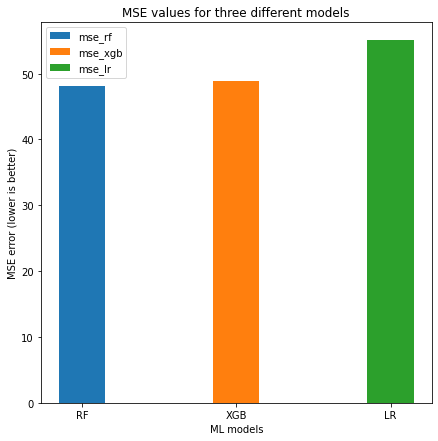

In [127]:

# mse error values
mse_rf = mean_squared_error(y_test, y_pred_RF)
mse_xgb = mean_squared_error(y_test, y_pred_XG)
mse_lr = mean_squared_error(y_test, y_pred_LR)

# Position of bars on x-axis
ind = ['RF' , 'XGB' , 'LR']

# Figure size
plt.figure(figsize=(7,7))

# Plotting
plt.bar(ind[0], mse_rf , width, label='mse_rf')
plt.bar(ind[1], mse_xgb, width, label='mse_xgb')
plt.bar(ind[2], mse_lr, width, label='mse_lr')

plt.xlabel('ML models')
plt.ylabel('MSE error (lower is better)')
plt.title('MSE values for three different models')

# Show the legend in the graph
plt.legend(loc='best')
plt.show()

### 4.1 Choosing the best model using hypothesis testing

In [111]:
# create X and y arrays for the hypothesis testing
X = np.concatenate((X_train, X_test), axis = 0)

X.shape

(9099, 11)

In [102]:
y = np.concatenate((y_train, y_test), axis = 0)

y.shape

(9099,)

In [103]:
from mlxtend.evaluate import paired_ttest_5x2cv

#### Before the test, we will set the significant threshold alpha = 0.05.
We will perform a **Paired student's t-test with a 5x2 Cross Validation**. This means that we will use a two-fold CV with five repeats and then use the Paired t-test to test if the performance of the two models is statistically significant or not.

**Null hypothesis**: The average performance (mean squared error) of the Random Forest model and the XG Boost model are identical.

**Alternate hypothesis**: The average performance of the two models are not identical and there is a statistically significant difference in their performance

In [112]:
# significance threshold
alpha = 0.05

In [104]:
t, p = paired_ttest_5x2cv(estimator1=best_randomforest, estimator2=best_xgboost, X=X, y=y, scoring='neg_mean_squared_error', random_seed=42)

In [105]:
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

P-value: 0.450, t-Statistic: 0.820


In [107]:
if p < alpha:
    print("P-value is less than alpha. Hence, we can reject the Null hypothesis and choose the Alternate hypothesis")
else:
    print("P-value is greater than or equal to alpha. Hence, we cannot reject the Null hypothesis")

P-value is greater than or equal to alpha. Hence, we cannot reject the Null hypothesis


From the above P-value, it is clear that the mean performance of the two models is most likely similar and we cannot choose one over the other with statistical confidence.

### Hence, both the Random forest and the XG Boost models perform equally well on this dataset